In [149]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [141]:
X,y = load_diabetes(return_X_y=True)

In [142]:
X_test,X_train,y_test,y_train = tts(X,y,train_size=0.3)

In [143]:
class Stochastic:
    def __init__(self,epoches = 50,lr = 0.2):
        self.lr = lr
        self.epoches = epoches
        self.intercept = None
        self.coef = None
    
    def fit(self, X_train,y_train):
        self.coef = np.ones(X_train.shape[1])
        self.intercept = 0

        for i in range(self.epoches):
            for j in range(X_train.shape[0]):
                rand = np.random.randint(0,X_train.shape[0])
                y_hat = np.dot(X_train[rand],self.coef) + self.intercept

                der_intercept = -2 * (y_train[rand] - y_hat)
                self.intercept = self.intercept - (der_intercept * self.lr)

                der_coef = - 2* np.dot((y_train[rand] - y_hat), X_train[rand])
                self.coef = self.coef - (der_coef * self.lr)

        print('Intercept', self.intercept)
        print('coeficent',self.coef)

               
               
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef) + self.intercept


    

In [144]:
S = Stochastic(20,0.001)
S.fit(X_train,y_train)

Intercept 154.8099963793102
coeficent [ 10.34845909   2.00959919  27.97115084  21.69957054   8.88314758
   8.06002863 -17.02467846  19.27942398  24.74015055  17.87732942]


In [145]:
y_pred = S.predict(X_test)
y_pred

array([148.39385881, 156.46349383, 156.27092096, 149.63043908,
       153.19943241, 159.22224974, 155.67688287, 152.42105756,
       146.16952924, 156.45070796, 158.83389802, 148.86963159,
       151.4159354 , 162.11794902, 152.9149731 , 151.29206797,
       159.42211773, 152.87145729, 157.83227913, 163.54033425,
       152.8072337 , 151.38071714, 150.94131189, 149.60130646,
       151.7396914 , 145.93134685, 151.26506068, 164.43903993,
       151.64712224, 153.92944876, 156.28425431, 154.87344553,
       145.10444395, 145.20062471, 156.01134593, 156.65442563,
       154.40669249, 156.52760758, 146.09421428, 153.09564774,
       153.97779919, 149.59983042, 159.65795535, 158.55741776,
       154.31584904, 155.01889263, 160.18480268, 158.73393473,
       160.75203497, 155.73709805, 147.09311591, 148.76399626,
       154.53572709, 148.31493996, 153.90340054, 148.54529753,
       148.57814086, 157.94241842, 153.85820348, 151.89431792,
       164.32372972, 147.53379846, 152.05017579, 155.97

In [146]:
r2_score(y_test,y_pred)

0.05190245158639861

In [147]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [148]:
predictions = model.predict(X_test)
r2_score(y_test,predictions)

0.46336412639546143

ValueError: x and y must be the same size

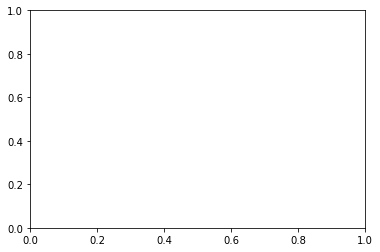

In [150]:
plt.scatter(X_train,y_train)